In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

csv_path = Path("data/beam_bip_results.csv")
df = pd.read_csv(csv_path)

agg = (df.groupby("width")
         .agg(obj_mean=("obj","mean"),
              obj_min =("obj","min"),
              obj_max =("obj","max"),
              time_ms_mean=("time_ms","mean"),
              time_ms_p95 =("time_ms", lambda s: s.quantile(0.95)))
         .reset_index())
display(agg)


,width,obj_mean,obj_min,obj_max,time_ms_mean,time_ms_p95
0,1,43.8,0,176,25.2,138.6
1,3,42.8,0,172,0.0,0.0
2,5,42.2,0,172,0.0,0.0
3,10,42.2,0,172,0.0,0.0
4,20,42.2,0,172,0.0,0.0


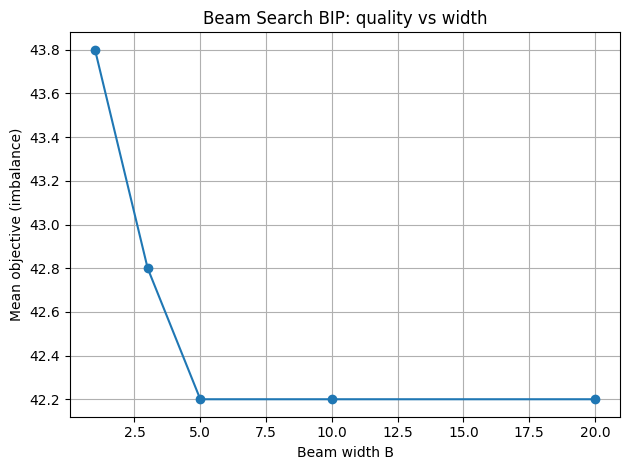

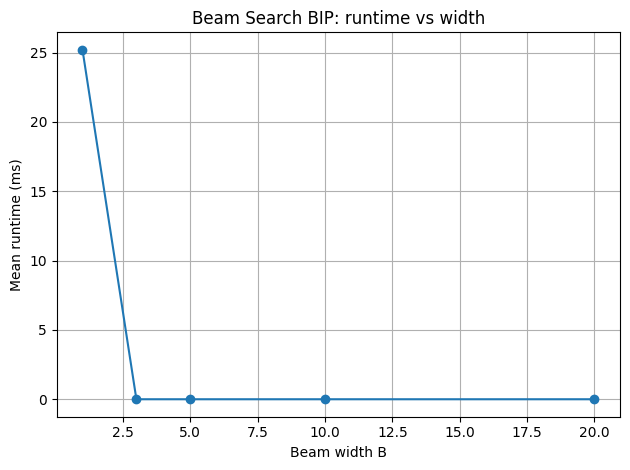

In [3]:
plt.figure()
plt.plot(agg["width"], agg["obj_mean"], marker="o")
plt.xlabel("Beam width B")
plt.ylabel("Mean objective (imbalance)")
plt.title("Beam Search BIP: quality vs width")
plt.grid(True)
plt.tight_layout()
plt.savefig("data/beam_bip_quality_vs_width.png", dpi=160)

plt.figure()
plt.plot(agg["width"], agg["time_ms_mean"], marker="o")
plt.xlabel("Beam width B")
plt.ylabel("Mean runtime (ms)")
plt.title("Beam Search BIP: runtime vs width")
plt.grid(True)
plt.tight_layout()
plt.savefig("data/beam_bip_time_vs_width.png", dpi=160)
